<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, _), (test_images, _) = datasets.mnist.load_data()

Using TensorFlow backend.


train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8


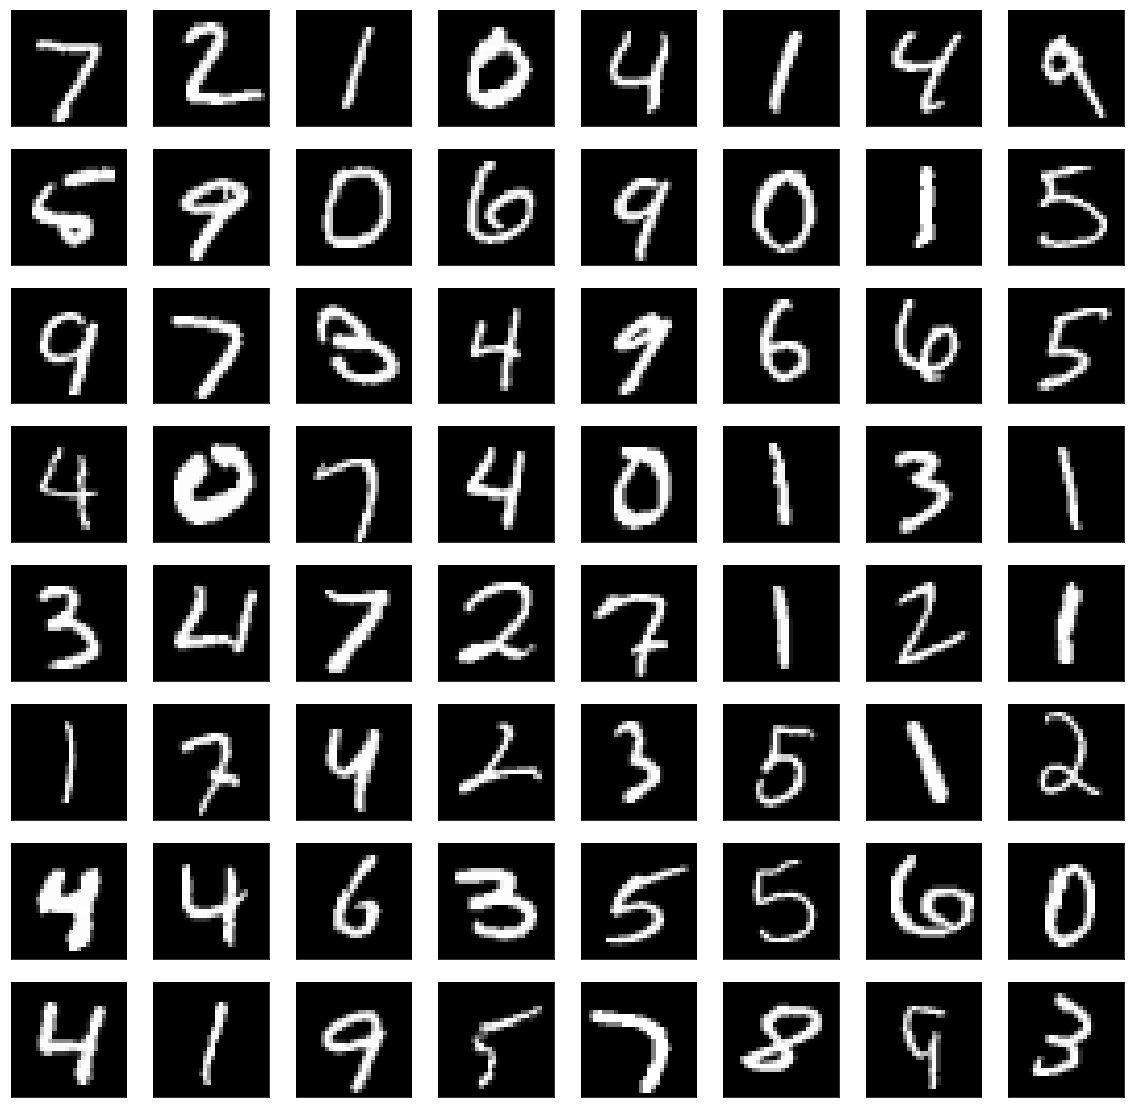

In [2]:
print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow( test_images[i], cmap="gray" )

In [3]:
_, H, W = train_images.shape
train_x = ( train_images.reshape(-1, H * W) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, H *W) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (10000, 784) float32


In [4]:
# X -> Z -> y : 784 -> 36 -> 784
# Z : ReLU
# y : Sigmoid
# optimizer : adam
# loss : mse or binary_crossentropy (cf. categorical_crossentropy)

class AE(models.Model):
    
    def __init__(self, input_dim, z_dim = 36):
        x = layers.Input(shape=(input_dim,), name='x')
        z = layers.Dense(z_dim, activation='relu', name='z')(x)
        y = layers.Dense(input_dim, activation='sigmoid', name='y')(z)
        
        super().__init__(x, y)
        
        self.x = x
        self.z = z
        self.z_dim = z_dim
        
        self.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
    def encoder(self):
        return models.Model(self.x, self.z)
    
    def decoder(self):
        z = layers.Input(shape=(self.z_dim, ), name='z_input')
        y = self.get_layer('y')(z)
        return models.Model(z, y)

In [65]:
autoencoder = AE(H * W, 36)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
z (Dense)                    (None, 36)                28260     
_________________________________________________________________
y (Dense)                    (None, 784)               29008     
Total params: 57,268
Trainable params: 57,268
Non-trainable params: 0
_________________________________________________________________


In [66]:
hist = autoencoder.fit(train_x, train_x, batch_size=128, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.2386 - acc: 0.7909 - val_loss: 0.1680 - val_acc: 0.8040
Epoch 2/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.1485 - acc: 0.8063 - val_loss: 0.1327 - val_acc: 0.8096
Epoch 3/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.1236 - acc: 0.8102 - val_loss: 0.1157 - val_acc: 0.8124
Epoch 4/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.1102 - acc: 0.8121 - val_loss: 0.1055 - val_acc: 0.8136
Epoch 5/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1017 - acc: 0.8131 - val_loss: 0.0991 - val_acc: 0.8144
Epoch 6/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.0965 - acc: 0.8137 - val_loss: 0.0952 - val_acc: 0.8147
Epoch 7/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.0934 - acc: 0.8140 - val_loss: 0.0930 - val_acc

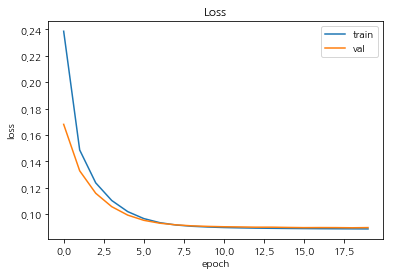

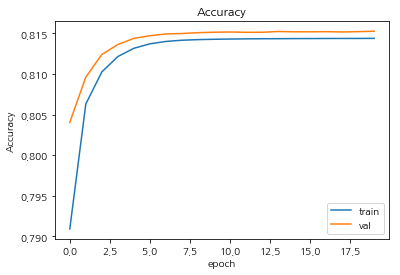

10000/10000 [==============================] - 0s 16us/step
[loss, accuracy]: [0.08778817055225373, 0.8136582950592041]


In [67]:
from modules.plot_history import plot_loss, plot_acc

plot_loss(hist, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

performance_test = autoencoder.evaluate(test_x, test_x, batch_size=128)
print('[loss, accuracy]:', performance_test)

In [68]:
encoder = autoencoder.encoder()
decoder = autoencoder.decoder()
encoder.summary()
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
z (Dense)                    (None, 36)                28260     
Total params: 28,260
Trainable params: 28,260
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_input (InputLayer)         (None, 36)                0         
_________________________________________________________________
y (Dense)                    (None, 784)               29008     
Total params: 29,008
Trainable params: 29,008
Non-trainable params: 0
_________________________________________________________________


In [69]:
# decoded_imgs = autoencoder.predict(test_x)
encoded_vals = encoder.predict(test_x)
decoded_imgs = decoder.predict(encoded_vals)

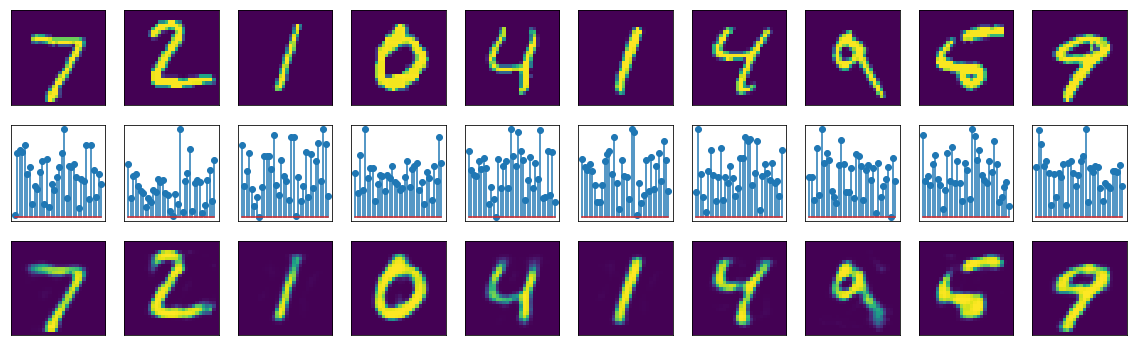

In [70]:
plt.figure( figsize=(20,6) )
n = 10

for i in range(0, n):
    plt.subplot(3, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow( test_x[i].reshape(H,W) )

    plt.subplot(3, 10, 10+i+1)
    plt.xticks([]); plt.yticks([])
    plt.stem( encoded_vals[i] )

    plt.subplot(3, 10, 20+i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow( decoded_imgs[i].reshape(H,W) )

plt.show()